# Predicting heart disease using machine learning

This notebook looks into using various python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes. 

We're going to take the following approach:

1. Problem definition 
2. Data
3. Evaluation 
4. Features 
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement, 

> Give clinicial paramters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original dataset is from Cleavland data UCI Machine Learing Repository

https://archive.ics.uci.edu/ml/datasets/heart+disease

It can also be found on Kaggle as well.

https://www.kaggle.com/ronitf/heart-disease-uci



## 3. Evaluation 

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept.

## 4. Features 

*** Data dictioanry ***

1. age
2. sex
3. chest pain type (4 values) 0: typical angina, 1: atpical angina, 2: non anginal pain, 3: asymptomatic 
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Preparing the tools 

We are going to use pandas, matplotlib and umpy for data analysis and manipulation

In [5]:
# Import the require libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data



In [12]:
df  = pd.read_csv("heart-disease.csv")

df.head # rows and columns

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1      

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become subject matter export on the dataset you're working with

1. what question are you trying to solve?
2. what kind of data do we have and how do we treat different types?
3. what's missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. how can you add, change or remove features to get more out of your data?




In [14]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [15]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

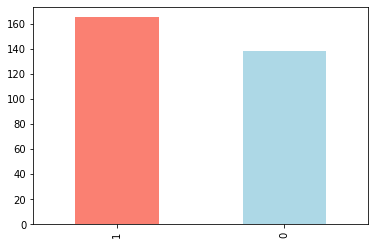

In [17]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [19]:
# are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [23]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [32]:
# compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


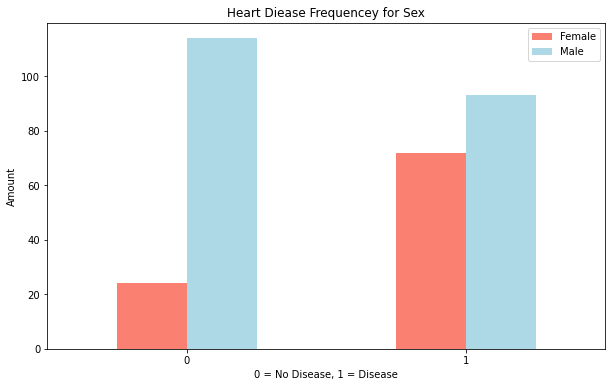

In [31]:
# Create a plot for crosstab 

pd.crosstab(df.target, df.sex).plot(kind="bar", 
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"]);

plt.title("Heart Diease Frequencey for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

### Age vs Max Heart Rate Disease

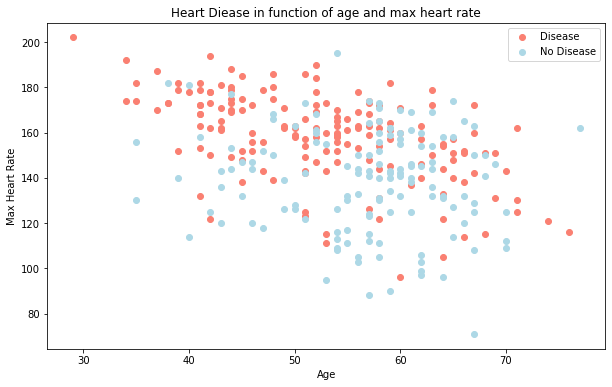

In [45]:
# Create a figure 
plt.figure(figsize=(10,6))

# Scatter with positive examples
# 1 = heart disease, 0 = no heart disease
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

# Add some useful legend
plt.title("Heart Diease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);
#plt.xticks(rotation=90);

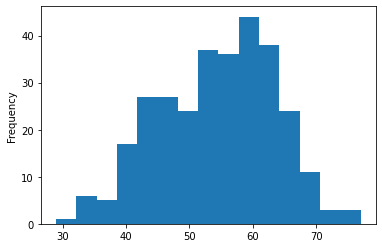

In [50]:
# Check the distribution of age columns with a historgram 
# Should be gaussian distribution

df.age.plot.hist(bins=15);

### Heart Disease Frequency per Chest Pain Type
Chest pain type (4 values) 
* 0: typical angina - chest pain related decrease blood supply to heart 
* 1: atpical angina - chest pain not reltead to heart
* 2: non anginal pain - typically esophageal spasms (non heart reated)
* 3: asymptomatic - chest pain not showing signs of disease


In [51]:
pd.crosstab(df.cp, df.target) 

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


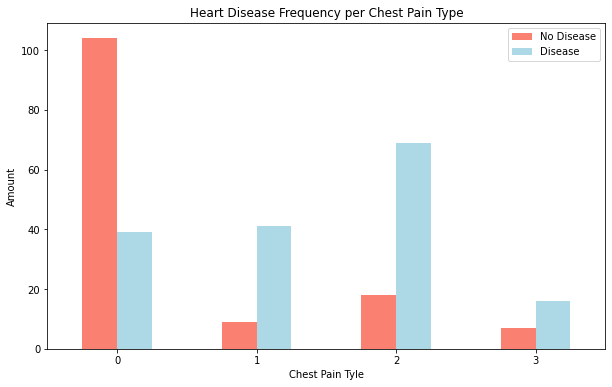

In [52]:
# Create a plot for crosstab 

pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Tyle")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);
plt.xticks(rotation=0);

In [53]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
# Make a correlation matrix

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


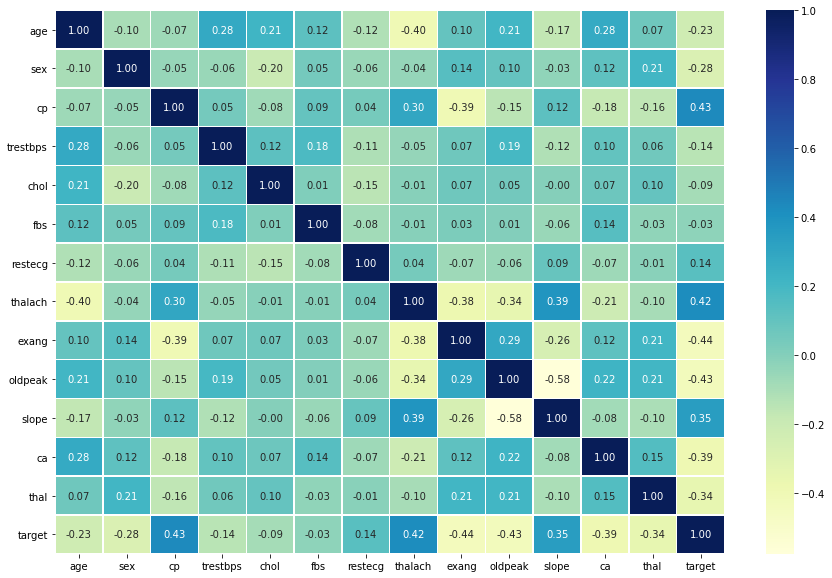

In [56]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

## 5. Modeling 

In [60]:
np.random.seed(99)

# Split data into X and Y
X = df.drop("target", axis=1)
y = df["target"]

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

![title](ml_map.png)

In [66]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2


In [70]:
len(y_train) # only has the labels 

242

Now we've got our data split into training and test sets, its time to build a ML Model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set. 

Which model to use? (Reference on top)
1. Logistic Regression
2. K-Nearest Neighbours Classifer
3. Random Forest Classifer 

In [79]:
# Put models in a dictionary

models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score model

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning model
    models: a dictionary of different scikit-learn machine learning models
    X_train: training data (no labels)
    X_test: test data (no labels)
    y_train: training labels
    y_test: test labels
    
    """
    
    # Set random seed so its re-produceable 
    np.random.seed(99)
    # Make a dictionary to keep model score
    model_scores = {}
    # Loop through the models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaulate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [81]:
model_scores = fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)

model_scores

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819672131147541,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.819672131147541}

### Model Comparison 

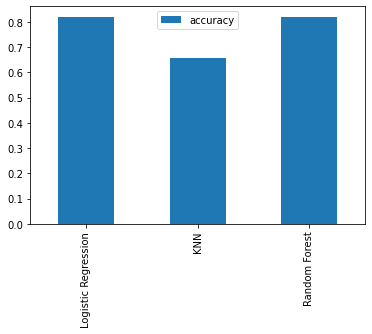

In [82]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we have a baseline model.. and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Corss validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve 

## Hyperparameter Tuning KNN

In [90]:
# Tuning KNN first

train_scores = []
test_scores = []

neighbors = range(1,50)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fit the algo
    knn.fit(X_train, y_train)
    
    # update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # update the test score list
    test_scores.append(knn.score(X_test, y_test))

In [84]:
test_scores

[0.639344262295082,
 0.5737704918032787,
 0.7049180327868853,
 0.6065573770491803,
 0.6557377049180327,
 0.6721311475409836,
 0.6229508196721312,
 0.6065573770491803,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6229508196721312,
 0.639344262295082,
 0.6229508196721312,
 0.6557377049180327,
 0.6065573770491803,
 0.639344262295082,
 0.5901639344262295,
 0.6229508196721312,
 0.5901639344262295]

In [85]:
train_scores

[1.0,
 0.8099173553719008,
 0.7933884297520661,
 0.743801652892562,
 0.7603305785123967,
 0.7396694214876033,
 0.7355371900826446,
 0.731404958677686,
 0.7107438016528925,
 0.7148760330578512,
 0.6900826446280992,
 0.7024793388429752,
 0.7107438016528925,
 0.7024793388429752,
 0.7107438016528925,
 0.6983471074380165,
 0.6983471074380165,
 0.6900826446280992,
 0.6818181818181818,
 0.6735537190082644]

Maximum KNN score on the test data: 70.49%


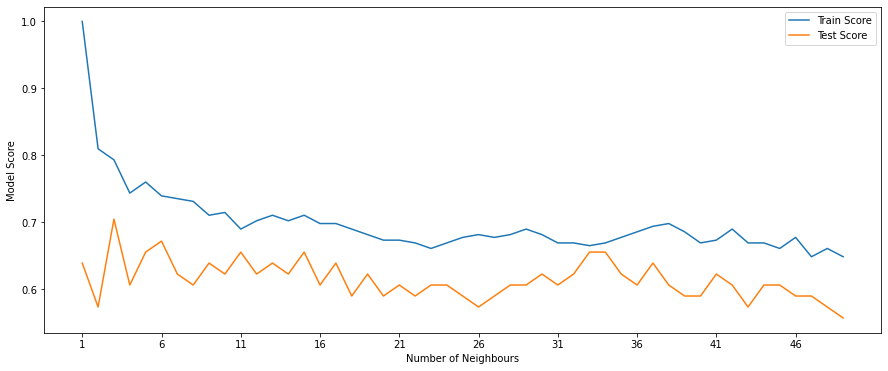

In [94]:
plt.figure(figsize=(15,6))
plt.plot(neighbors,train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,50,5))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter Tuning RandomizedSearchCV

### We are going to tune:
    * LogisticRegression()
    * RandomForestClassifer()
    * RandomizedSearchCV()

In [119]:
# Create a hyperparameter grid for LogisticRegresison
# Adjusting only two hyperparameter

log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver": ["liblinear"]}

rf_grid = {"n_estimators": np.arange(10,1000,50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2)}

In [101]:
# Log space reductions
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [114]:
# Tune LogisticRegression

np.random.seed(99)

# Setup random hyperparameter search for LogisticRegresison

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [115]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [108]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

Now we have tune Logistic Regression, lets do it for Random Forest Classifer

In [120]:
# Setup random Seed

np.random.seed(99)

# Setup Random Hyperparameters 
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search mode for RandomForestClassifer
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


In [121]:
rs_rf.best_params_

{'n_estimators': 410,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_depth': 5}

In [122]:
rs_rf.score(X_test, y_test)

0.9016393442622951

In [123]:
model_scores

{'Logistic Regression': 0.819672131147541,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.819672131147541}

## Hyperparamter Tuning with GridSearchCV

Since our Logistic Regressionn model provides the best score so far, we will improve them again using GridSerachCV
(brute force)

In [127]:
# Different Hyperparameters for our Logistic Regression model

log_reg_grid = {"C": np.logspace(-4,4,30),
               "solver": ["liblinear"]}

# Setup grid hyperparameters search with LogisticRegression

gs_log_reg = GridSearchCV(LogisticRegression(),
                           param_grid=log_reg_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=True)
# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.3s finished


In [128]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [131]:
# Evaluate the grid search Logistic Regression Model
gs_log_reg.score(X_test, y_test)

0.8524590163934426

In [132]:
# Original Score
model_scores

{'Logistic Regression': 0.819672131147541,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.819672131147541}

## Evaluting our tuned machine learning classifer, beyond accuracy 

* ROC and AUC
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1

In [133]:
# Make predictions with tuned model

y_preds = gs_log_reg.predict(X_test)

In [134]:
y_preds

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [135]:
y_test

137    1
262    0
43     1
90     1
32     1
      ..
264    0
40     1
214    0
183    0
6      1
Name: target, Length: 61, dtype: int64

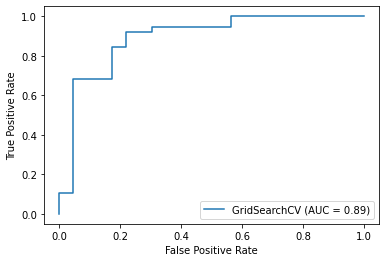

In [137]:
# Make ROC Curve and AUC 

plot_roc_curve(gs_log_reg, X_test, y_test);

In [138]:
# Confusion Matrix 

print(confusion_matrix(y_test, y_preds))

[[18  5]
 [ 4 34]]


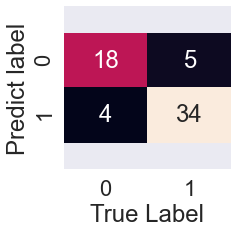

In [145]:
sns.set(font_scale=2.0)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predict label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_mat(y_test, y_preds)

Classification report and cross validation prediction, recall and f1 score

In [146]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.87      0.89      0.88        38

    accuracy                           0.85        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.85      0.85      0.85        61



### Calculate evaluation matrics using cross validation

We are going to calculate precision, recall and f1 score of our model using cross-validation and to do so using cross_val_score()

In [147]:
# Check best hyperparameter

gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [148]:
# Create a new classifer with best parameters

clf=LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [155]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.834808743169399

In [156]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_acc)
cv_precision

0.834808743169399

In [157]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9030303030303031

In [159]:
# Cross-validated f1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8572876223964057

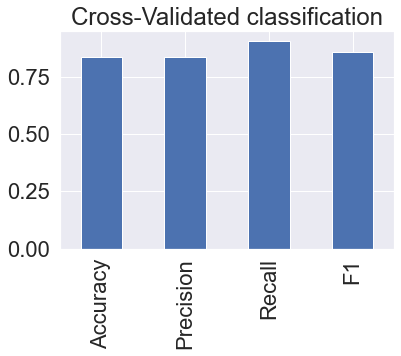

In [163]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-Validated classification",
                     legend=False);

### Feature Importance 

Feature importance is another as asking, which features contributed most to the outcome of the model 
and how did they contributed?

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for Model Name feature importance?



In [170]:
# Fit an instance of LogisticRegression

gs_log_reg.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [174]:
clf = LogisticRegression(C=0.1082636733874054, solver="liblinear")

clf.fit(X_train, y_train);

In [175]:
# Check Coefficient 
# This gives us how each paramters (x_train) data contributes to the target label
clf.coef_

array([[ 0.02043445, -0.5816301 ,  0.63365324, -0.02297274, -0.00471008,
         0.02983008,  0.32255794,  0.02948594, -0.30859305, -0.44016674,
         0.31699422, -0.60470015, -0.51686579]])

In [179]:
# Match Coefficient of features to columns
# Map
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.02043445286671146,
 'sex': -0.5816300970907611,
 'cp': 0.6336532353737026,
 'trestbps': -0.022972739619689615,
 'chol': -0.004710082193311835,
 'fbs': 0.029830082233920734,
 'restecg': 0.3225579446592887,
 'thalach': 0.029485943845349825,
 'exang': -0.30859305012461896,
 'oldpeak': -0.44016673656173433,
 'slope': 0.3169942182985859,
 'ca': -0.6047001464643706,
 'thal': -0.5168657895774776}

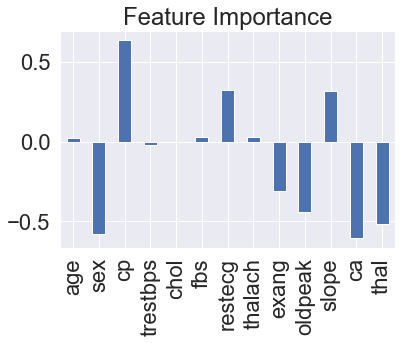

In [182]:
# Visualize Feature Importance 

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [185]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# Key Takeaway

We can look at the data and see there are some positive correlation on cp, restecg and slope to predict heart disease. 